# Creation of seven networks

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import math
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

/home/jean-marie/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parent_dir = os.path.abspath(os.path.join(os.path.abspath(os.getcwd()), os.pardir))

## Sensors and pixel signals

In [3]:
synth_xytv = pd.read_csv(os.path.join(os.path.join(parent_dir,'session','synth_all_'+str(6400),'tab'),'dataset.csv'))

In [4]:
synth_xytv

,x,y,truth,sensor_hq,sensor_mq,sensor_lq,agg_truth,pixel_hq,pixel_mq,pixel_lq
0,0.494602,0.122994,1.486247,1.491757,1.568579,1.552504,1.546848,1.640307,1.649661,1.651999
1,0.228083,0.683757,0.855385,0.877419,0.947531,0.858785,0.867768,0.937494,0.895069,0.929150
2,0.255474,0.080199,0.234323,0.246771,0.241975,0.271725,0.198416,0.250107,0.249220,0.346182
3,0.396330,0.714549,1.583621,1.650587,1.575823,1.884845,1.495739,1.572540,1.529556,1.702193
4,0.377315,0.423686,0.727369,0.736385,0.756312,0.737704,0.789590,0.860942,0.837533,0.875211
...,...,...,...,...,...,...,...,...,...,...
6395,0.178851,0.329088,0.959616,0.966348,1.103739,0.941374,0.906653,0.990243,1.077203,0.875278
6396,0.507812,0.582770,1.244534,1.264103,1.200245,1.418302,1.227688,1.280834,1.473870,0.559345
6397,0.114565,0.449625,0.662260,0.683924,0.735795,0.493577,0.744038,0.799591,0.661217,1.089156
6398,0.972229,0.548972,1.061588,1.078521,1.039269,1.173883,0.994949,1.049058,1.145227,1.187644


## comparison of the different signals against ground truth

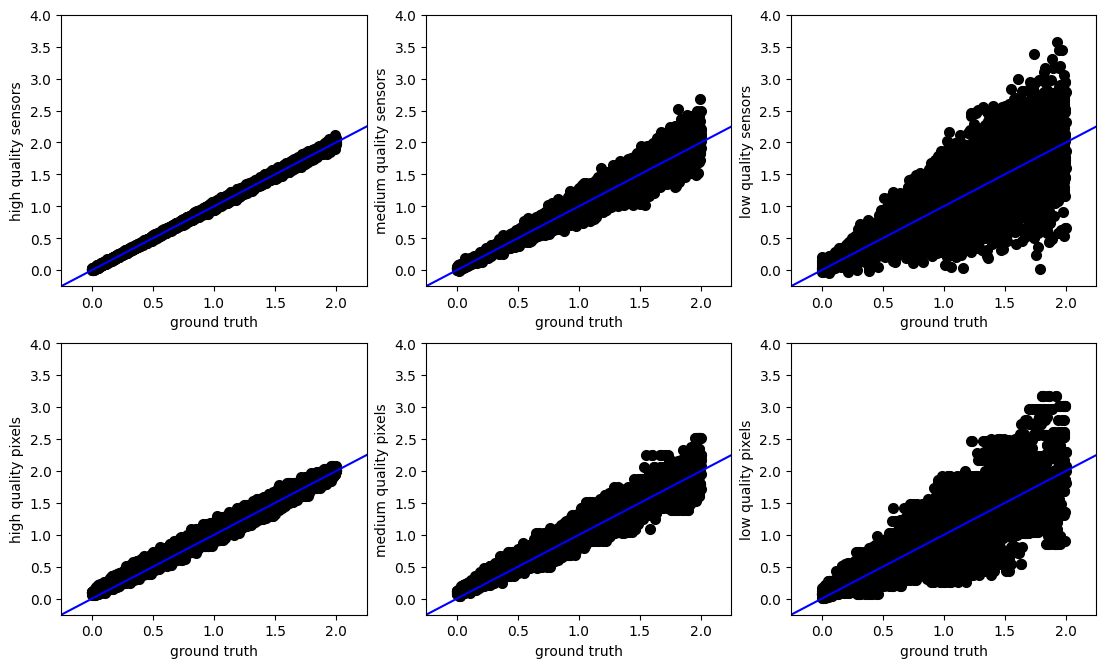

In [5]:

fig = plt.figure(constrained_layout=True,figsize=(14, 12))
gs = GridSpec(4, 4, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
ax1.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"sensor_hq"], linewidth=2.0,c="black")
ax1.axline((0, 0), slope=1., color='blue')
ax1.set_xlim(-0.25, 2.25)
ax1.set_ylim(-0.25, 4)
ax1.set(xlabel='ground truth', ylabel='high quality sensors')

ax2 = fig.add_subplot(gs[0,1])
ax2.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"sensor_mq"], linewidth=2.0,c="black")
ax2.axline((0, 0), slope=1., color='blue')
ax2.set_xlim(-0.25, 2.25)
ax2.set_ylim(-0.25, 4)
ax2.set(xlabel='ground truth', ylabel='medium quality sensors')

ax3 = fig.add_subplot(gs[0,2])
ax3.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"sensor_lq"], linewidth=2.0,c="black")
ax3.axline((0, 0), slope=1., color='blue')
ax3.set_xlim(-0.25, 2.25)
ax3.set_ylim(-0.25, 4)
ax3.set(xlabel='ground truth', ylabel='low quality sensors')

ax4 = fig.add_subplot(gs[1,0])
ax4.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"pixel_hq"], linewidth=2.0,c="black")
ax4.axline((0, 0), slope=1., color='blue')
ax4.set_xlim(-0.25, 2.25)
ax4.set_ylim(-0.25, 4)
ax4.set(xlabel='ground truth', ylabel='high quality pixels')

ax5 = fig.add_subplot(gs[1,1])
ax5.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"pixel_mq"], linewidth=2.0,c="black")
ax5.axline((0, 0), slope=1., color='blue')
ax5.set_xlim(-0.25, 2.25)
ax5.set_ylim(-0.25, 4)
ax5.set(xlabel='ground truth', ylabel='medium quality pixels')

ax6 = fig.add_subplot(gs[1,2])
ax6.scatter(synth_xytv.loc[:,"truth"],synth_xytv.loc[:,"pixel_lq"], linewidth=2.0,c="black")
ax6.axline((0, 0), slope=1., color='blue')
ax6.set_xlim(-0.25, 2.25)
ax6.set_ylim(-0.25, 4)
ax6.set(xlabel='ground truth', ylabel='low quality pixels')

fig_filename = os.path.join(parent_dir,'fig','synth_qqplot.png')
plt.savefig(fig_filename, dpi = 300)

## Producing dataset for the experiments

In [6]:
def produce_sample(all_xyv,nb_sampling,index,name,parent_dir):
    
    sampling_xyv = all_xyv.iloc[index]
    
    newpath = os.path.join(parent_dir,'session','synth_'+str(nb_sampling)+'_'+name,'tab')
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    f = os.path.join(newpath,'dataset.csv')
    sampling_xyv.to_csv(f,index=False)

In [7]:
def produce_set(all_xyv,nb_sampling,parent_dir,seed=50):
    np.random.seed(seed)
    index1 = random.sample([x for x in range(all_xyv.shape[0])], nb_sampling)
    index2 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1], nb_sampling)
    index3 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2], nb_sampling)
    index4 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3], nb_sampling)
    index5 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3 and x != index4], nb_sampling)
    index6 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3 and x != index4 and x != index5], nb_sampling)
    index7 = random.sample([x for x in range(all_xyv.shape[0]) if x != index1 and x != index2 and x != index3 and x != index4 and x != index5 and x != index6], nb_sampling)
    
    produce_sample(all_xyv,nb_sampling,index1,'Y_train',parent_dir)
    produce_sample(all_xyv,nb_sampling,index2,'X_train',parent_dir)
    produce_sample(all_xyv,nb_sampling,index3,'Y_valid',parent_dir)
    produce_sample(all_xyv,nb_sampling,index4,'X_valid',parent_dir)
    produce_sample(all_xyv,nb_sampling,index5,'Y_eval',parent_dir)
    produce_sample(all_xyv,nb_sampling,index6,'X_eval',parent_dir)
    produce_sample(all_xyv,nb_sampling,index7,'colocation',parent_dir)

In [8]:
produce_set(synth_xytv,1000,parent_dir)